/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_37861/712488013.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  bond_price.drop(columns=['index'], inplace=True)


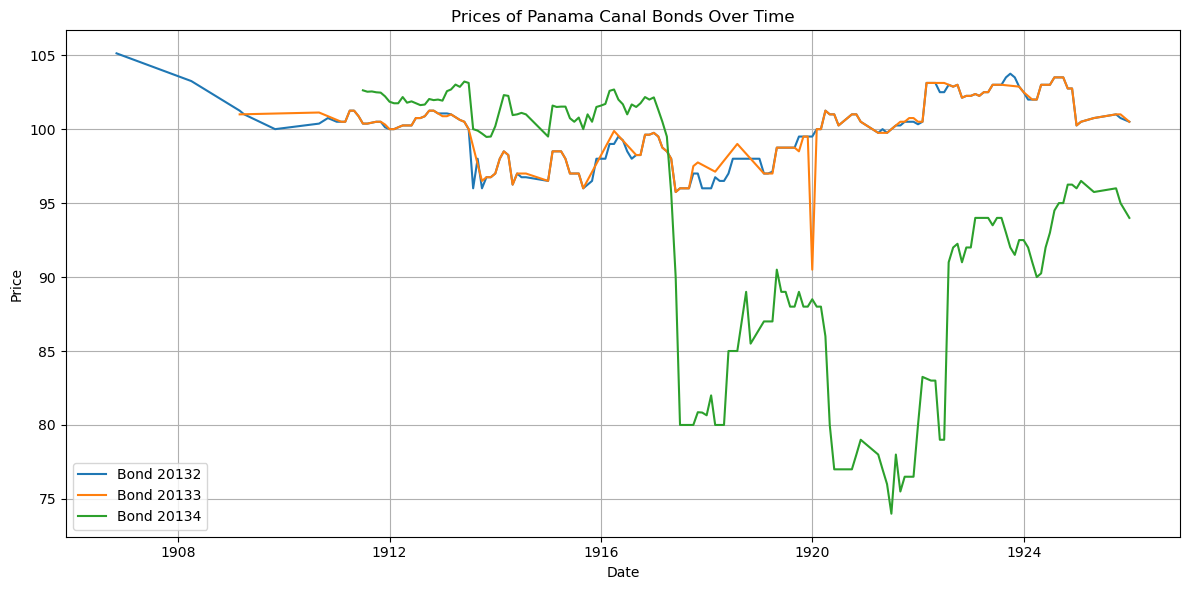

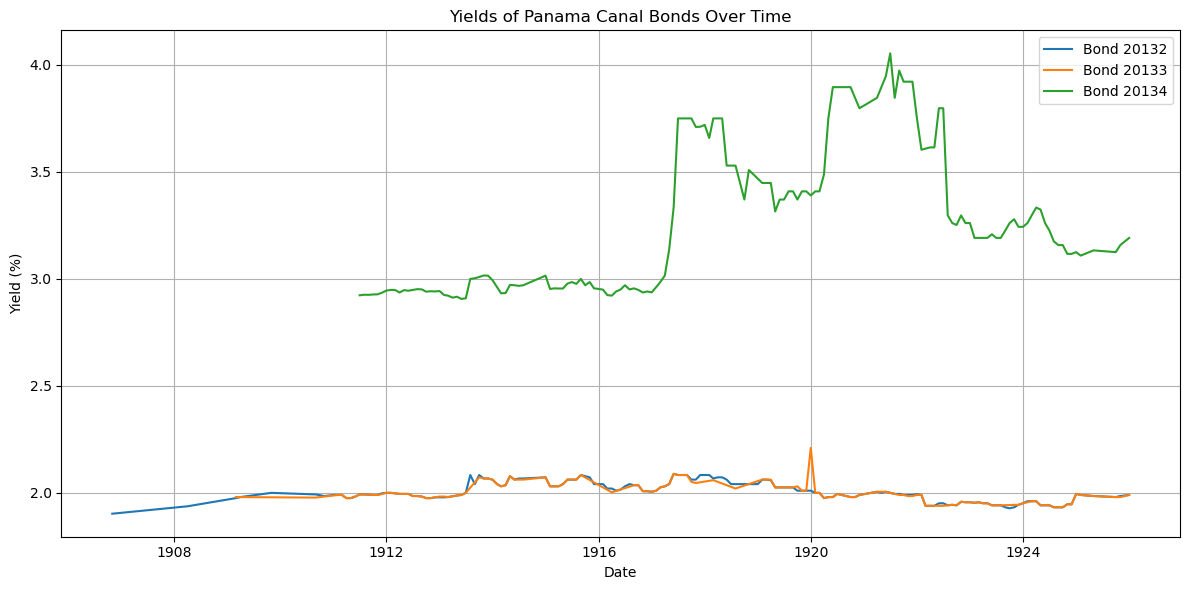

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

bond_h5 = pd.HDFStore("data/BondDF.h5", mode="r")
bond_list = bond_h5["BondList"]
bond_price = bond_h5["BondPrice"]
bond_h5.close()

panama_bond_ids = [20132, 20133, 20134]

bond_price.reset_index(inplace=True)
bond_price['Date'] = pd.to_datetime(bond_price['index'], errors='coerce')
bond_price.set_index('Date', inplace=True)
bond_price.drop(columns=['index'], inplace=True)

panama_bonds_info = bond_list[bond_list['L1 ID'].isin(panama_bond_ids)]
coupon_rates = panama_bonds_info.set_index('L1 ID')['Coupon Rate']

plt.figure(figsize=(12, 6))
for l1_id in panama_bond_ids:
    if (l1_id, 'Average') in bond_price.columns:
        bond_data = bond_price[(l1_id, 'Average')].dropna()
        if not bond_data.empty:
            plt.plot(bond_data.index, bond_data.values, label=f'Bond {l1_id}')
plt.title('Prices of Panama Canal Bonds Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for l1_id in panama_bond_ids:
    if (l1_id, 'Average') in bond_price.columns:
        bond_data = bond_price[(l1_id, 'Average')].dropna()
        if not bond_data.empty:
            yield_data = (coupon_rates[l1_id] / bond_data.values) * 100  # Yield as a percentage
            plt.plot(bond_data.index, yield_data, label=f'Bond {l1_id}')
plt.title('Yields of Panama Canal Bonds Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()